In [1]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

import yfinance as yf

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD, Adam

### Get a sample stock price from 2019-01-01 to today

In [3]:
# Get the data of the Apple stock (code AAPL)
data = yf.download('AAPL','2019-01-01','2020-04-30')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,158.529999,159.360001,156.479996,157.740005,154.618546,35003500
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.794983,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.376251,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.326126,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,145.002686,54777800


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,158.529999,159.360001,156.479996,157.740005,154.618546,35003500
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.794983,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.376251,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.326126,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,145.002686,54777800
...,...,...,...,...,...,...
2020-04-23,275.869995,281.750000,274.869995,275.029999,274.287506,31203600
2020-04-24,277.200012,283.010010,277.000000,282.970001,282.206085,31627200
2020-04-27,281.799988,284.540009,279.950012,283.170013,282.405548,29271900


### Extract the Close price column to plot

In [5]:
df = pd.DataFrame(data, columns=['Close'])
df = df.reset_index()
df.isna().values.any() # check for NaN

False

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


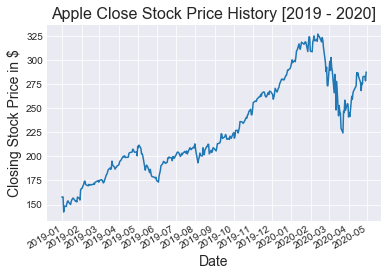

In [6]:
# Import matplotlib package for date plots

months = mdates.MonthLocator() # Get every year
dateFmt = mdates.DateFormatter('%Y-%m') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)

# Set figure title
plt.title('Apple Close Stock Price History [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

### Get stock of Apple, Google, Microsoft, Amazon, Facebook via Yahoo Finance

In [7]:
def get_close_stock_price(codes, start_date='2009-01-01', end_date='2020-04-30'):
    data = { code : yf.download(code, start_date, end_date) for code in codes }
    #print(data)
    data = { key : pd.DataFrame(value, columns=['Close']).rename(columns={'Close': f'{key}'}) for key, value in data.items() }
    df = None
    #print(data)
    for key, value in data.items():
        if df is None:
            df = value
        else:
            df = df.merge(value, left_index=True, right_index=True)
    return df

df = get_close_stock_price(['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB'])
df.to_csv('data/close_price_big_5.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
df

,AAPL,GOOGL,MSFT,AMZN,FB
Date,,,,,
2012-05-18,75.768570,300.500488,29.270000,213.850006,38.230000
2012-05-21,80.182854,307.362366,29.750000,218.110001,34.029999
2012-05-22,79.567146,300.700714,29.760000,215.330002,31.000000
2012-05-23,81.508568,305.035034,29.110001,217.279999,32.000000
2012-05-24,80.760002,302.132141,29.070000,215.240005,33.029999
...,...,...,...,...,...
2020-04-23,275.029999,1271.170044,171.419998,2399.449951,185.130005
2020-04-24,282.970001,1276.599976,174.550003,2410.219971,190.070007
2020-04-27,283.170013,1270.859985,174.050003,2376.000000,187.500000


### Create X, y matrices for regression
Use history = number of days before prediction date

In [9]:
def create_Xy(df, history=1):
    '''df has index as date
    columns are stock price of the companies
    '''
    X, y, dates = [], [], []
    for row_idx in range(history, len(df)):
        y.append( df.iloc[row_idx,:].values.reshape(-1) )
        X.append( df.iloc[row_idx-history:row_idx,:].values.reshape(-1) )
        dates.append(df.index[row_idx])
    X, y = np.array(X), np.array(y)
    return X, y, dates

X,y,dates = create_Xy(df, history=5)
# use 7/10 of the dataset to train (use past price to predict future price)
n_train = len(y) * 2 // 10
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

### Try to stack two linear layers and use SGD to optimize

In [10]:
X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()
y_train = (y_train - y_train.mean())/y_train.std()
y_test = (y_test - y_test.mean())/y_test.std()

In [11]:
class Model(torch.nn.Module):
    def __init__(self,input,output,hidden=[128,256]):
        super().__init__()
        self.ReLU = nn.ReLU()
        self.fc1 = nn.Linear(input, output)
    def forward(self, x):
        #print(x)
        y_pred = self.fc1(x)
        return y_pred
model = Model(25,5)

In [12]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [13]:
#X_train, y_train, X_test, y_test = [torch.from_numpy(dataset).float for dataset in [X_train, y_train, X_test, y_test]]
from torch.autograd import Variable
X_train_ = Variable(torch.Tensor([X_train]))
y_train_ = Variable(torch.Tensor([y_train]))
X_test_ = Variable(torch.Tensor([X_test]))
y_test_ = Variable(torch.Tensor([y_test]))
for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(X_train_)
    # Compute Loss
    loss = criterion(y_pred, y_train_)
    print(loss)
    # Backward pass
    loss.backward()
    optimizer.step()

tensor(1.0792, grad_fn=<MseLossBackward>)
tensor(1.0579, grad_fn=<MseLossBackward>)
tensor(1.0370, grad_fn=<MseLossBackward>)
tensor(1.0165, grad_fn=<MseLossBackward>)
tensor(0.9964, grad_fn=<MseLossBackward>)
tensor(0.9768, grad_fn=<MseLossBackward>)
tensor(0.9575, grad_fn=<MseLossBackward>)
tensor(0.9386, grad_fn=<MseLossBackward>)
tensor(0.9202, grad_fn=<MseLossBackward>)
tensor(0.9020, grad_fn=<MseLossBackward>)
tensor(0.8843, grad_fn=<MseLossBackward>)
tensor(0.8669, grad_fn=<MseLossBackward>)
tensor(0.8498, grad_fn=<MseLossBackward>)
tensor(0.8331, grad_fn=<MseLossBackward>)
tensor(0.8168, grad_fn=<MseLossBackward>)
tensor(0.8007, grad_fn=<MseLossBackward>)
tensor(0.7850, grad_fn=<MseLossBackward>)
tensor(0.7696, grad_fn=<MseLossBackward>)
tensor(0.7546, grad_fn=<MseLossBackward>)
tensor(0.7398, grad_fn=<MseLossBackward>)
tensor(0.7253, grad_fn=<MseLossBackward>)
tensor(0.7111, grad_fn=<MseLossBackward>)
tensor(0.6972, grad_fn=<MseLossBackward>)
tensor(0.6836, grad_fn=<MseLossBac

In [14]:
y_pred = model(X_test_)
print (criterion(y_pred, y_test_))

tensor(0.3077, grad_fn=<MseLossBackward>)


In [15]:
y_test_.size()

torch.Size([1, 1596, 5])

### Create a Linear Regression Model to predict stock price

In [16]:
clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

In [17]:
mean_squared_error(ypred,y_test) 

0.0019448134692688385

### Investigate in relation amongst stock price of 5 companies

Text(0, 0.5, 'AMZN')

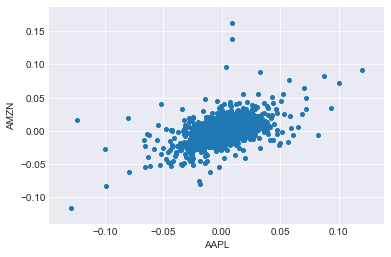

In [18]:
pct = df.pct_change()
plt.scatter(pct.AAPL, pct.GOOGL)
plt.xlabel('AAPL')
plt.ylabel('AMZN')

In [19]:
pct.corr()

,AAPL,GOOGL,MSFT,AMZN,FB
AAPL,1.000000,0.519106,0.551098,0.419733,0.366184
GOOGL,0.519106,1.000000,0.634554,0.597365,0.482885
MSFT,0.551098,0.634554,1.000000,0.534474,0.396318
AMZN,0.419733,0.597365,0.534474,1.000000,0.427496
FB,0.366184,0.482885,0.396318,0.427496,1.000000


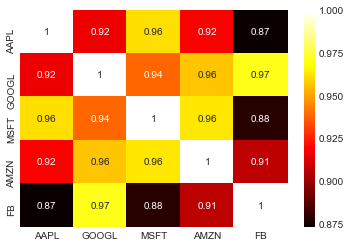

In [20]:
import seaborn as sns 
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='hot')

# Exercise
1. Play with the above code to get familiar with stock price data and ways to create training data ( X = past stock price, y = future stock price )
2. Investigate if stock price of Big 5 companies are related to each other ( “FAAMG”—Facebook, Amazon, Apple, Microsoft, and Google )
3. Determine the features that could predict future stock price ( stock price from Yahoo Finance could be considered as raw features, create new features if needed )
4. Build a linear regression model to predict future stock price
5. Evaluate your model performance